## Getting csv data with historical ask, bid values

In [6]:
import requests
_id = "a70c1619-3994-44c3-80e1-7b8b0d9c8922" # your algo name before the .log
id_token = "eyJraWQiOiJ4M3NhZjFZTkNsRGwyVDljemdCR01ybnVVMlJlNDNjb1E1UGxYMWgwb2tBPSIsImFsZyI6IlJTMjU2In0.eyJzdWIiOiIzOTA4M2M0NS04MmI3LTRmMDMtYWM5MS02ZWVjNDJjMzU3YzIiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiaXNzIjoiaHR0cHM6XC9cL2NvZ25pdG8taWRwLmV1LXdlc3QtMS5hbWF6b25hd3MuY29tXC9ldS13ZXN0LTFfek9mVngwcWl3IiwiY29nbml0bzp1c2VybmFtZSI6IjM5MDgzYzQ1LTgyYjctNGYwMy1hYzkxLTZlZWM0MmMzNTdjMiIsIm9yaWdpbl9qdGkiOiJiMTI4OTQ4ZS0zNGQ3LTRlMDItYTc2Mi05ZDFjZDQyNDljYjIiLCJhdWQiOiIzMmM1ZGM1dDFrbDUxZWRjcXYzOWkwcjJzMiIsImV2ZW50X2lkIjoiMWNhZTA2Y2QtOTdiYS00ZDY3LWI0ZjYtNzI0MzY2ZTA3MTJmIiwidG9rZW5fdXNlIjoiaWQiLCJhdXRoX3RpbWUiOjE2Nzc4NjM3NzcsImV4cCI6MTY3OTYwOTEyMCwiaWF0IjoxNjc5NjA1NTIwLCJqdGkiOiI1NWE1MGFjZC03NDA0LTQ0ODgtYWM0YS01OTg4YjE2ZDlhMjkiLCJlbWFpbCI6InIucmV0aG1hd25AZ21haWwuY29tIn0.nE-sdWiwP0WN1-XGgCM7GiWjD0mXunG1IDF4HtGYew71J7cgdysW1QyzzvosByModOeMuLGy7c8HsS3yEWOruO8FpPMaaK5whVIO4by_gdEDg8Dx7StjKAJ2PUkraTf1o8HVtmL1B2At1hWsbWCEXCK3547eeYScluEjo2zhmns6XZOvoy3g4VXu2zy471DaGfVQtjZxMcofB9ffDIY0bUF9ICr95wjvpzswruF9CdrhYfjxkkiDJulThCl5oaQC6bHUa3ReF_0aZimkTY6qQ4yU3Iw_ENE4yYJo-6tNo0ADqjr_F9nw7PrGIDczekyhGTO0zaIgYcNUKX0fPpq96g"
headers = {
    'Authorization': "Bearer " + id_token
}
response = requests.get(
    url=f"https://bz97lt8b1e.execute-api.eu-west-1.amazonaws.com/prod/results/tutorial/{_id}",
    headers=headers
)

json_database = response.json()       


In [7]:
database_algorithm = json_database["algo"]

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
profitAndLoss = pd.DataFrame(database_algorithm["profitAndLoss"])

In [9]:
profitAndLoss.tail()

,timestamp,value
495,99000,2948.78125
496,99200,2927.6015625
497,99400,2997.171875
498,99600,2979.984375
499,99800,3114.875


/home/fenics/.local/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


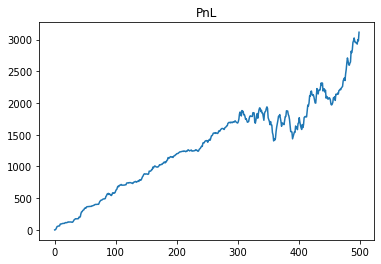

In [10]:
plt.figure(figsize = (6,4))
plt.plot(profitAndLoss.index, np.array(profitAndLoss.value.values, dtype=np.float32))
plt.title("PnL")
plt.show()

# Bollinger's analysis and position limits

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('seaborn')

In [20]:
csv_filepath = 'round_2_data/prices_round_2_day_0.csv'
csv_trade = pd.read_csv(csv_filepath, sep=';')

In [21]:
csv_trade.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
39995,0,999800,BANANAS,4869,27,NaN,NaN,NaN,NaN,4876,27,NaN,NaN,NaN,NaN,4872.5,123648.0
39996,0,999900,COCONUTS,8002,190,NaN,NaN,NaN,NaN,8005,190,NaN,NaN,NaN,NaN,8003.5,432688.0
39997,0,999900,PEARLS,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,-408.0
39998,0,999900,BANANAS,4870,23,NaN,NaN,NaN,NaN,4876,2,4877.0,21.0,NaN,NaN,4873.0,121460.0
39999,0,999900,PINA_COLADAS,15011,108,NaN,NaN,NaN,NaN,15014,108,NaN,NaN,NaN,NaN,15012.5,297904.0


In [22]:
df_banana = csv_trade[csv_trade['product'] == 'BANANAS'].sort_values(by=["timestamp"])
df_pearl = csv_trade[csv_trade['product'] == 'PEARLS'].sort_values(by=["timestamp"])
df_pina_coladas = csv_trade[csv_trade['product'] == 'PINA_COLADAS'].sort_values(by=["timestamp"])
df_coconuts = csv_trade[csv_trade['product'] == 'COCONUTS'].sort_values(by=["timestamp"])

In [23]:
df_pina_coladas.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
39983,0,999500,PINA_COLADAS,15004,95,NaN,NaN,NaN,NaN,15007,95,NaN,NaN,NaN,NaN,15005.5,319308.0
39987,0,999600,PINA_COLADAS,15002,107,NaN,NaN,NaN,NaN,15005,107,NaN,NaN,NaN,NaN,15003.5,325204.0
39991,0,999700,PINA_COLADAS,15003,77,NaN,NaN,NaN,NaN,15006,77,NaN,NaN,NaN,NaN,15004.5,321456.0
39993,0,999800,PINA_COLADAS,15010,23,15009.0,74.0,NaN,NaN,15013,97,NaN,NaN,NaN,NaN,15011.5,301608.0
39999,0,999900,PINA_COLADAS,15011,108,NaN,NaN,NaN,NaN,15014,108,NaN,NaN,NaN,NaN,15012.5,297904.0


In [24]:
df_coconuts.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
39981,0,999500,COCONUTS,8001,79,8000.0,126.0,NaN,NaN,8003,205,NaN,NaN,NaN,NaN,8002.0,447396.0
39985,0,999600,COCONUTS,8000,163,NaN,NaN,NaN,NaN,8002,52,8003.0,111.0,NaN,NaN,8001.0,453252.0
39989,0,999700,COCONUTS,8000,54,7999.0,111.0,NaN,NaN,8002,165,NaN,NaN,NaN,NaN,8001.0,454772.0
39992,0,999800,COCONUTS,8002,193,NaN,NaN,NaN,NaN,8004,76,8005.0,117.0,NaN,NaN,8003.0,437620.0
39996,0,999900,COCONUTS,8002,190,NaN,NaN,NaN,NaN,8005,190,NaN,NaN,NaN,NaN,8003.5,432688.0


In [25]:
csv_trade.groupby('product').agg({'mid_price': ['mean', 'std', 'min', 'max']})

mid_price                             
                     mean        std      min      max
product                                               
BANANAS        4889.50765   7.622357   4869.5   4911.0
COCONUTS       8062.71045  29.986229   7987.5   8121.5
PEARLS         9999.99975   1.496228   9996.5  10003.5
PINA_COLADAS  15103.29585  68.855452  14957.5  15250.5

In [26]:
csv_filepath_trades = 'round_2_data/trades_round_2_day_0_nn.csv'
csv_filepath_trades = pd.read_csv(csv_filepath_trades, sep=';')
csv_filepath_trades.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
1,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,2
2,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,1
3,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
4,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1


In [27]:
csv_filepath_trades.groupby('quantity').agg({'price': ['mean', 'std', 'min', 'max']})

price                              
                 mean          std     min      max
quantity                                           
0         7078.857143  2733.103695  4886.0  10002.0
1         7239.487461  2550.770421  4870.0  15057.0
2         7970.318436  2959.929660  4869.0  15242.0
3         8437.467742  3378.691214  4875.0  15233.0
4         8917.746341  3353.687707  4869.0  15240.0
...               ...          ...     ...      ...
66        8045.500000    74.246212  7993.0   8098.0
67        8050.000000    22.912878  8025.0   8070.0
68        8072.000000          NaN  8072.0   8072.0
71        8050.000000          NaN  8050.0   8050.0
74        8091.000000          NaN  8091.0   8091.0

[69 rows x 4 columns]

## Bollinger's band Analysis 
### First for coconuts and pina coladas

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


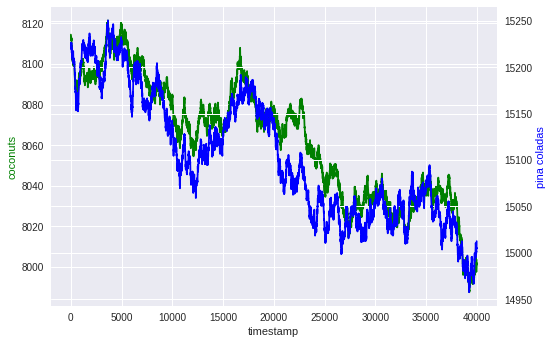

In [28]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(df_coconuts.index, df_coconuts["mid_price"], color="green")
ax.set_ylabel("coconuts", color="green")
ax.set_xlabel("timestamp")
ax2.plot(df_pina_coladas.index, df_pina_coladas["mid_price"], color="blue")
ax2.set_ylabel("pina coladas", color="blue")
plt.show()

In [29]:
def SMA(data, period, column = 'mid_price'):
    return data[column].rolling(window = period).mean()

df_coconuts['sma_15'] = SMA(df_coconuts, 15)
df_pina_coladas['sma_15'] = SMA(df_pina_coladas, 15)

In [30]:
#x = df_coconuts.mid_price.pct_change().fillna(0)
#y = df_pina_coladas.mid_price.pct_change().fillna(0)
x = df_coconuts.sma_15.pct_change().fillna(0)
y = df_pina_coladas.sma_15.pct_change().fillna(0)

In [31]:
lag_init, lag_end = 50, 1500
correlation = np.correlate(
    x[lag_init:lag_end],
    y[lag_init:lag_end],
    mode="full")

std_limits = np.array([0.8 * correlation[lag_end - lag_init - 1:].std()] * (lag_end - lag_init))
print(std_limits.shape)
print(x[lag_init:lag_end].shape)
print(correlation[lag_end - lag_init - 1:].shape)

(1450,)
(1450,)
(1450,)


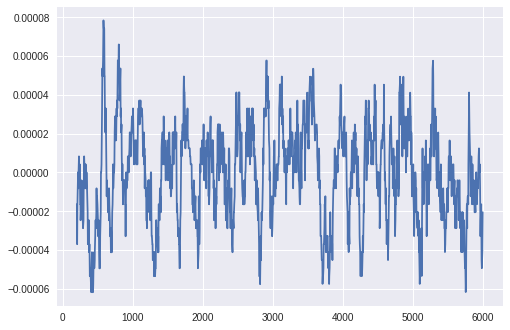

In [32]:
plt.plot(x[lag_init:lag_end])

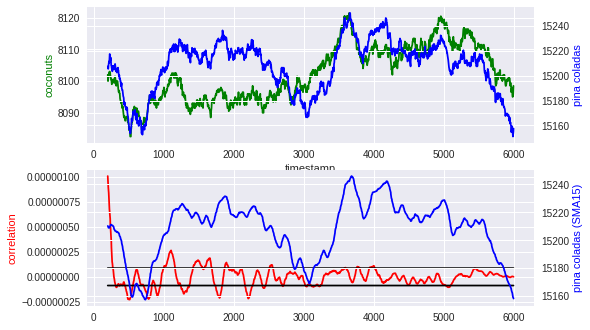

In [33]:
fig, (ax_up, ax_down) = plt.subplots(nrows=2)
ax2 = ax_up.twinx()
ax_up.plot(df_coconuts.index[lag_init:lag_end], df_coconuts["mid_price"][lag_init:lag_end], color="green")
ax_up.set_ylabel("coconuts", color="green")
ax_up.set_xlabel("timestamp")
ax2.plot(df_pina_coladas.index[lag_init:lag_end], df_pina_coladas["mid_price"][lag_init:lag_end], color="blue")
ax2.set_ylabel("pina coladas", color="blue")

ax2_vis = ax_down.twinx()
ax_down.plot(df_coconuts.index[lag_init:lag_end], correlation[lag_end - lag_init - 1:], color="red")
ax_down.plot(df_coconuts.index[lag_init:lag_end], std_limits, color="black")
ax_down.plot(df_coconuts.index[lag_init:lag_end], -std_limits, color="black")
ax_down.set_ylabel("correlation", color="red")
ax.set_xlabel("timestamp")
ax2_vis.plot(df_pina_coladas.index[lag_init:lag_end], df_pina_coladas.sma_15[lag_init:lag_end], color="blue")
ax2_vis.set_ylabel("pina coladas (SMA15)", color="blue")

plt.show()

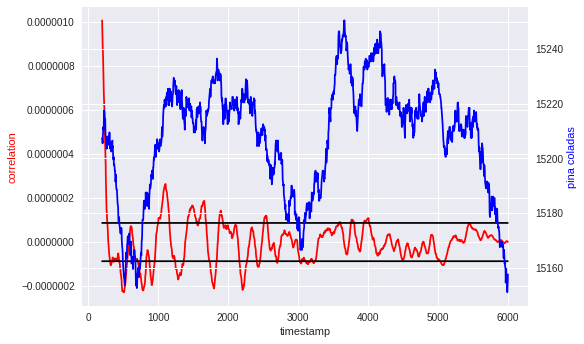

In [34]:
#std_limits = np.array([0.75 * correlation[lag_end - lag_init - 1:].std()] * (lag_end - lag_init))

fig, ax = plt.subplots()
ax2 = ax.twinx()
#ax.plot(df_coconuts.index, df_coconuts["mid_price"], color="green")
ax.plot(df_coconuts.index[lag_init:lag_end], correlation[lag_end - lag_init - 1:], color="red")
ax.plot(df_coconuts.index[lag_init:lag_end], std_limits, color="black")
ax.plot(df_coconuts.index[lag_init:lag_end], -std_limits, color="black")
ax.set_ylabel("correlation", color="red")
ax.set_xlabel("timestamp")
ax2.plot(df_pina_coladas.index[lag_init:lag_end], df_pina_coladas["mid_price"][lag_init:lag_end], color="blue")
ax2.set_ylabel("pina coladas", color="blue")
plt.show()

In [36]:
# bid ratios
df_pina_coladas["spread"] = df_pina_coladas.ask_price_1 - df_pina_coladas.bid_price_1
df_pina_coladas["l1_ratio"] = df_pina_coladas.bid_volume_1 / df_pina_coladas.ask_volume_1
df_pina_coladas["l2_ratio"] = df_pina_coladas.bid_volume_2 / df_pina_coladas.ask_volume_2
df_pina_coladas["l3_ratio"] = df_pina_coladas.bid_volume_3 / df_pina_coladas.ask_volume_3

metrics = ['count', 'mean', 'std', 'quantile']
df_pina_coladas.groupby("spread").agg({'l1_ratio': metrics, 'l2_ratio': metrics, 'l3_ratio': metrics})

l1_ratio                              l2_ratio                      \
          count      mean       std quantile    count      mean       std   
spread                                                                      
1           601  3.270029  5.498266     2.55      196  1.136146  0.823114   
2          2143  0.912046  0.311944     1.00     1825  1.017277  0.091319   
3          7256  1.201803  0.839414     1.00        0       NaN       NaN   

                 l3_ratio                    
        quantile    count mean std quantile  
spread                                       
1       0.699934        0  NaN NaN      NaN  
2       1.000000        0  NaN NaN      NaN  
3            NaN        0  NaN NaN      NaN

In [35]:
# bid ratios
df_coconuts["spread"] = df_coconuts.ask_price_1 - df_coconuts.bid_price_1
df_coconuts["l1_ratio"] = df_coconuts.bid_volume_1 / df_coconuts.ask_volume_1
df_coconuts["l2_ratio"] = df_coconuts.bid_volume_2 / df_coconuts.ask_volume_2
df_coconuts["l3_ratio"] = df_coconuts.bid_volume_3 / df_coconuts.ask_volume_3

metrics = ['count', 'mean', 'std', 'quantile']
df_coconuts.groupby("spread").agg({'l1_ratio': metrics, 'l2_ratio': metrics, 'l3_ratio': metrics})

l1_ratio                               l2_ratio                     \
          count      mean       std  quantile    count     mean       std   
spread                                                                      
1           618  3.816895  7.945227  2.786669      132  1.41539  0.352979   
2          3977  1.558457  1.420480  0.423913      146  1.00000  0.000000   
3          5405  0.999214  0.011166  1.000000        0      NaN       NaN   

                 l3_ratio                    
        quantile    count mean std quantile  
spread                                       
1       1.446404        0  NaN NaN      NaN  
2       1.000000        0  NaN NaN      NaN  
3            NaN        0  NaN NaN      NaN

In [38]:
def EWM(data, span_size, column = 'mid_price'):
    ewm_mean = data[column].ewm(span = span_size, adjust=False).mean()
    ewm_std = data[column].ewm(span = span_size, adjust=False).std()
    return ewm_mean, ewm_std

# Setting up Bananas DF
df_coconuts['ewm_12'], df_coconuts["ewm_12_std"] = EWM(df_coconuts, 12)
df_coconuts['ewm_26'], df_coconuts["ewm_26_std"] = EWM(df_coconuts, 26)
df_coconuts['macd'] = df_coconuts["ewm_12"] - df_coconuts["ewm_26"]
df_coconuts['signal'] = df_coconuts["macd"].ewm(span=9, adjust=False).mean() 
 # Buy & Sell signals
df_coconuts['macd_buy'] = np.where(df_coconuts.macd > df_coconuts.signal, True, False)
print("count BULLISH signal \n", df_coconuts.macd_buy.value_counts())
df_coconuts['macd_sell'] = np.where(df_coconuts.macd < df_coconuts.signal, True, False)
print("count BEARING signal \n", df_coconuts.macd_sell.value_counts())

count BULLISH signal 
 True     5065
False    4935
Name: macd_buy, dtype: int64
count BEARING signal 
 False    5066
True     4934
Name: macd_sell, dtype: int64


<IPython.core.display.Javascript object>


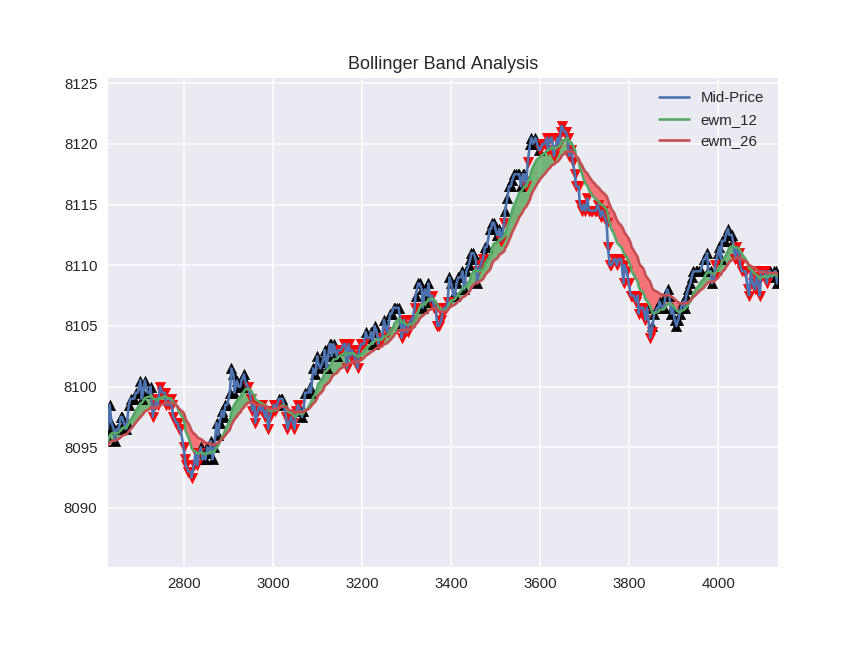

In [49]:
%matplotlib notebook
plt.figure(figsize = (8,6))
plt.plot(df_coconuts[['mid_price', 'ewm_12', 'ewm_26']])
plt.fill_between(df_coconuts.index, df_coconuts.ewm_12, df_coconuts.ewm_26, where=df_coconuts.ewm_12>df_coconuts.ewm_26, color = 'green', alpha = 0.5)
plt.fill_between(df_coconuts.index, df_coconuts.ewm_12, df_coconuts.ewm_26, where=df_coconuts.ewm_12<df_coconuts.ewm_26, color = 'red', alpha = 0.5)
plt.scatter(df_coconuts.index[df_coconuts.macd_buy], df_coconuts[df_coconuts.macd_buy].mid_price, marker = '^', color = 'black')
plt.scatter(df_coconuts.index[df_coconuts.macd_sell], df_coconuts[df_coconuts.macd_sell].mid_price, marker = 'v', color = 'red')
plt.title('Bollinger Band Analysis')
plt.legend(['Mid-Price', 'ewm_12', 'ewm_26',])
#plt.show()

## Analysis for bananas

In [143]:
def SMA(data, period, column = 'mid_price'):
    return data[column].rolling(window = period).mean()

# Setting up Bananas DF
df_banana['SMA15'] = SMA(df_banana, 15)
df_banana['SMA50'] = SMA(df_banana, 50)
df_banana['SMA80'] = SMA(df_banana, 80)
df_banana['stdev'] = df_banana.mid_price.rolling(window = 15).std()
df_banana['Upper'] = df_banana.SMA15 + 1*df_banana.stdev
df_banana['Lower'] = df_banana.SMA15 - 1*df_banana.stdev 
 # Buy & Sell signals
df_banana['Buy_Signal'] = np.where(df_banana.Lower > df_banana.mid_price, True, False)
print("count BUY signal \n", df_banana.Buy_Signal.value_counts())
df_banana['Sell_Signal'] = np.where(df_banana.Upper < df_banana.mid_price, True, False)
print("count SELL signal \n", df_banana.Sell_Signal.value_counts())

count BUY signal 
 False    843
True     157
Name: Buy_Signal, dtype: int64
count SELL signal 
 False    843
True     157
Name: Sell_Signal, dtype: int64


In [149]:
df_banana["longterm_bullish"] = np.where(df_banana.SMA80 < df_banana.SMA50, True, False)
df_banana["longterm_bearish"] = np.where(df_banana.SMA50 < df_banana.SMA80, True, False)

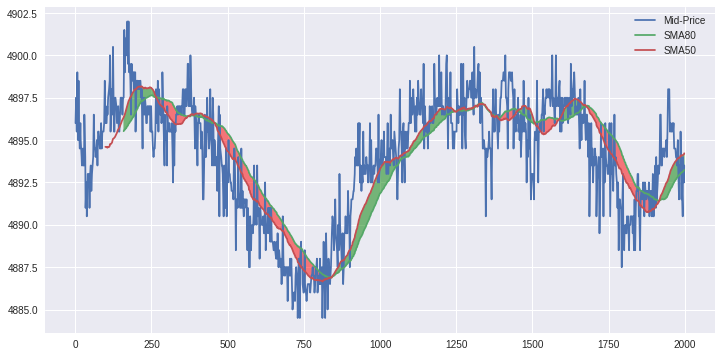

In [151]:
plt.figure(figsize = (12,6))
plt.plot(df_banana[["mid_price", "SMA80", "SMA50"]])
plt.legend(['Mid-Price', 'SMA80', 'SMA50'])
plt.fill_between(df_banana.index, df_banana.SMA50, df_banana.SMA80, where=df_banana.longterm_bullish, color = 'green', alpha = 0.5)
plt.fill_between(df_banana.index, df_banana.SMA50, df_banana.SMA80, where=df_banana.longterm_bearish, color = 'red', alpha = 0.5)
plt.show()

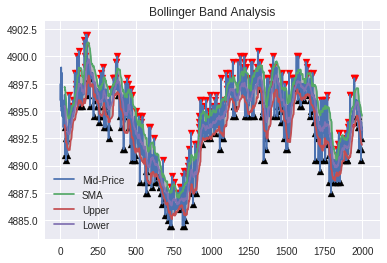

In [152]:
plt.figure(figsize = (6,4))
plt.plot(df_banana[['mid_price', 'Upper', 'Lower', 'SMA15']])
plt.fill_between(df_banana.index, df_banana.Upper, df_banana.Lower, color = 'grey', alpha = 0.5)
plt.scatter(df_banana.index[df_banana.Buy_Signal], df_banana[df_banana.Buy_Signal].mid_price, marker = '^', color = 'black')
plt.scatter(df_banana.index[df_banana.Sell_Signal], df_banana[df_banana.Sell_Signal].mid_price, marker = 'v', color = 'red')
plt.title('Bollinger Band Analysis')
plt.legend(['Mid-Price', 'SMA', 'Upper', 'Lower'])
plt.show()

In [153]:
def hurst_exponent(data, max_lag = 40):
    values = data.values
    lags = np.arange(1, max_lag + 1)
    tau = [np.std(np.subtract(values[lag:], values[:-lag]))
          for lag in lags]
    poly = np.polyfit(np.log10(lags), np.log10(tau), 1)
    print("Hurst exponent found ", poly[0])
    print("Is it bullish ", poly[0] > 0.5)
    
for max_lag in np.arange(100, 10000, 500):
    print("max_lag ", max_lag)
    hurst_exponent(df_banana.mid_price, max_lag=max_lag)

max_lag  100
Hurst exponent found  0.253910941791834
Is it bullish  False
max_lag  600
Hurst exponent found  0.1361239240465344
Is it bullish  False
max_lag  1100
Hurst exponent found  nan
Is it bullish  False
max_lag  1600


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Hurst exponent found  nan
Is it bullish  False
max_lag  2100
Hurst exponent found  nan
Is it bullish  False
max_lag  2600
Hurst exponent found  nan
Is it bullish  False
max_lag  3100
Hurst exponent found  nan
Is it bullish  False
max_lag  3600
Hurst exponent found  nan
Is it bullish  False
max_lag  4100
Hurst exponent found  nan
Is it bullish  False
max_lag  4600
Hurst exponent found  nan
Is it bullish  False
max_lag  5100
Hurst exponent found  nan
Is it bullish  False
max_lag  5600
Hurst exponent found  nan
Is it bullish  False
max_lag  6100
Hurst exponent found  nan
Is it bullish  False
max_lag  6600
Hurst exponent found  nan
Is it bullish  False
max_lag  7100
Hurst exponent found  nan
Is it bullish  False
max_lag  7600
Hurst exponent found  nan
Is it bullish  False
max_lag  8100
Hurst exponent found  nan
Is it bullish  False
max_lag  8600
Hurst exponent found  nan
Is it bullish  False
max_lag  9100
Hurst exponent found  nan
Is it bullish  False
max_lag  9600
Hurst exponent found  na

# Statistics for each Volume Level Ratio

In [154]:
# bid ratios
df_banana["spread"] = df_banana.ask_price_1 - df_banana.bid_price_1
df_banana["l1_ratio"] = df_banana.bid_volume_1 / df_banana.ask_volume_1
df_banana["l2_ratio"] = df_banana.bid_volume_2 / df_banana.ask_volume_2
df_banana["l3_ratio"] = df_banana.bid_volume_3 / df_banana.ask_volume_3

In [155]:
metrics = ['count', 'mean', 'std', 'quantile']
df_banana.groupby("spread").agg({'l1_ratio': metrics, 'l2_ratio': metrics, 'l3_ratio': metrics})

l1_ratio                                l2_ratio                      \
          count      mean        std  quantile    count      mean       std   
spread                                                                        
1            98  8.088182  11.060612  1.625000       16  1.592423  2.928260   
2            63  1.376640   3.465195  0.103448       13  1.858154  3.969275   
3            23  9.414709   9.513894  5.166667        5  1.057585  0.028637   
4            56  2.073588   4.227047  0.333333       21  0.938053  0.023401   
5           140  6.451408   6.804813  4.226190       14  1.076104  0.023667   
6           306  5.238889   8.964202  0.434286        0       NaN       NaN   
7           314  0.997447   0.010138  1.000000        0       NaN       NaN   

                 l3_ratio                    
        quantile    count mean std quantile  
spread                                       
1       1.042572        0  NaN NaN      NaN  
2       1.000000        0  NaN NaN      NaN  
3       1.043478        0  NaN NaN      NaN  
4       0.931034        0  NaN NaN      NaN  
5       1.085145        0  NaN NaN      NaN  
6            NaN        0  NaN NaN      NaN  
7            NaN        0  NaN NaN      NaN

In [156]:
# bid ratios
# df_banana["l1_ratio"] = df_banana.bid_volume_1 / df_banana.ask_volume_1
# df_banana["l2_ratio"] = df_banana.bid_volume_2 / df_banana.ask_volume_2
# df_banana["l3_ratio"] = df_banana.bid_volume_3 / df_banana.ask_volume_3

df_banana['l1_ge_one'] = np.where(df_banana.l1_ratio > 1, True, False) # bullish
df_banana['l1_le_one'] = np.where(df_banana.l1_ratio < 1, True, False)

for col, verbose in zip(["l1_ratio", "l2_ratio", "l3_ratio"], ["LEVEL 1", "LEVEL 2", "LEVEL 3"]):
    print("Does {} has zeros: {}".format(col, df_banana[col].eq(0).any()))
    indicator_buy = df_banana['Buy_Signal'] & df_banana[col]
    print("count BUY signal (SMA & Volume Momentum) {}\n {}".format(verbose, indicator_buy.value_counts()))
    indicator_sell = df_banana['Sell_Signal'] & df_banana[col]
    print("count SELL signal (SMA & Volume Momentum) {}\n {}".format(verbose, indicator_sell.value_counts()))
    print("------ TEST -------")

print("------ USED HERE -------")
print("SMA & Volume Momentum for 1st LEVEL")
sma_and_volume_buy = df_banana['Buy_Signal'] & df_banana['l1_ge_one']
print("count BUY signal (SMA & Volume Momentum) \n", sma_and_volume_buy.value_counts())
sma_and_volume_sell = df_banana['Sell_Signal'] & df_banana['l1_le_one']
print("count SELL signal (SMA & Volume Momentum) \n", sma_and_volume_sell.value_counts())

Does l1_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 1
 False    843
True     157
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 1
 False    843
True     157
dtype: int64
------ TEST -------
Does l2_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 2
 False    986
True      14
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 2
 False    983
True      17
dtype: int64
------ TEST -------
Does l3_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 3
 False    1000
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 3
 False    1000
dtype: int64
------ TEST -------
------ USED HERE -------
SMA & Volume Momentum for 1st LEVEL
count BUY signal (SMA & Volume Momentum) 
 False    889
True     111
dtype: int64
count SELL signal (SMA & Volume Momentum) 
 False    880
True     120
dtype: int64


## Using SMA 15 and Volume as Indicator

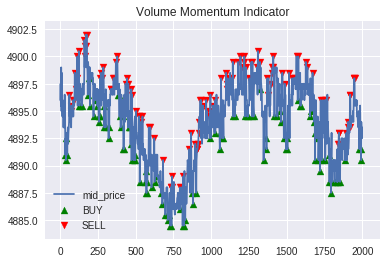

In [157]:
plt.figure(figsize = (6,4))
plt.plot(df_banana[['mid_price']])
#plt.fill_between(df_banana.index, df_banana.Upper, df_banana.Lower, color = 'grey', alpha = 0.5)
plt.scatter(df_banana[sma_and_volume_buy].index,df_banana[sma_and_volume_buy].mid_price, marker = '^', color = 'green')
plt.scatter(df_banana[sma_and_volume_sell].index, df_banana[sma_and_volume_sell].mid_price, marker = 'v', color = 'red')
plt.title('Volume Momentum Indicator')
plt.legend(["mid_price", "BUY", "SELL"])

## Analysis using MACD

In [158]:
def EWM(data, span_size, column = 'mid_price'):
    ewm_mean = data[column].ewm(span = span_size, adjust=False).mean()
    ewm_std = data[column].ewm(span = span_size, adjust=False).std()
    return ewm_mean, ewm_std

# Setting up Bananas DF
df_banana['ewm_12'], df_banana["ewm_12_std"] = EWM(df_banana, 12)
df_banana['ewm_26'], df_banana["ewm_26_std"] = EWM(df_banana, 26)
df_banana['macd'] = df_banana["ewm_12"] - df_banana["ewm_26"]
df_banana['signal'] = df_banana["macd"].ewm(span=9, adjust=False).mean() 
 # Buy & Sell signals
df_banana['macd_buy'] = np.where(df_banana.macd > df_banana.signal, True, False)
print("count BULLISH signal \n", df_banana.macd_buy.value_counts())
df_banana['macd_sell'] = np.where(df_banana.macd < df_banana.signal, True, False)
print("count BEARING signal \n", df_banana.macd_sell.value_counts())

count BULLISH signal 
 False    509
True     491
Name: macd_buy, dtype: int64
count BEARING signal 
 True     508
False    492
Name: macd_sell, dtype: int64


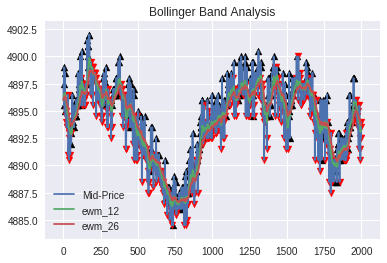

In [159]:
plt.figure(figsize = (6,4))
plt.plot(df_banana[['mid_price', 'ewm_12', 'ewm_26']])
plt.fill_between(df_banana.index, df_banana.ewm_12, df_banana.ewm_26, where=df_banana.ewm_12>df_banana.ewm_26, color = 'green', alpha = 0.5)
plt.fill_between(df_banana.index, df_banana.ewm_12, df_banana.ewm_26, where=df_banana.ewm_12<df_banana.ewm_26, color = 'red', alpha = 0.5)
plt.scatter(df_banana.index[df_banana.macd_buy], df_banana[df_banana.macd_buy].mid_price, marker = '^', color = 'black')
plt.scatter(df_banana.index[df_banana.macd_sell], df_banana[df_banana.macd_sell].mid_price, marker = 'v', color = 'red')
plt.title('Bollinger Band Analysis')
plt.legend(['Mid-Price', 'ewm_12', 'ewm_26',])
plt.show()

### Now for pearls

In [160]:
def SMA(data, period, column = 'mid_price'):
    return data[column].rolling(window = period).mean()

# Setting up Bananas DF
df_pearl['SMA15'] = SMA(df_pearl, 15)
df_pearl['SMA50'] = SMA(df_pearl, 50)
df_pearl['SMA80'] = SMA(df_pearl, 80)
df_pearl['stdev'] = df_pearl.mid_price.rolling(window = 15).std()
df_pearl['Upper'] = df_pearl.SMA15 + 2*df_pearl.stdev # using 2 x standard deviation
df_pearl['Lower'] = df_pearl.SMA15 - 2*df_pearl.stdev
df_pearl['Buy_Signal'] = np.where(df_pearl.Lower > df_pearl.mid_price, True, False) # Buy & Sell signals
df_pearl['Sell_Signal'] = np.where(df_pearl.Upper < df_pearl.mid_price, True, False)

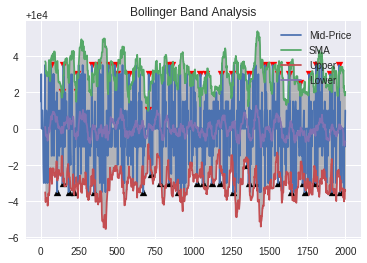

In [161]:
plt.figure(figsize = (6,4))
plt.plot(df_pearl[['mid_price', 'Upper', 'Lower', 'SMA15']])
plt.fill_between(df_pearl.index, df_pearl.Upper, df_pearl.Lower, color = 'grey', alpha = 0.5)
plt.scatter(df_pearl.index[df_pearl.Buy_Signal], df_pearl[df_pearl.Buy_Signal].mid_price, marker = '^', color = 'black')
plt.scatter(df_pearl.index[df_pearl.Sell_Signal], df_pearl[df_pearl.Sell_Signal].mid_price, marker = 'v', color = 'red')
plt.title('Bollinger Band Analysis')
plt.legend(['Mid-Price', 'SMA', 'Upper', 'Lower'])

In [162]:
# bid ratios
df_pearl["l1_ratio"] = df_pearl.bid_volume_1 / df_pearl.ask_volume_1
df_pearl["l2_ratio"] = df_pearl.bid_volume_2 / df_pearl.ask_volume_2
df_pearl["l3_ratio"] = df_pearl.bid_volume_3 / df_pearl.ask_volume_3

df_pearl['l1_ge_one'] = np.where(df_pearl.l1_ratio > 1, True, False) # bullish
df_pearl['l1_le_one'] = np.where(df_pearl.l1_ratio < 1, True, False)

for col, verbose in zip(["l1_ratio", "l2_ratio", "l3_ratio"], ["LEVEL 1", "LEVEL 2", "LEVEL 3"]):
    print("Does {} has zeros: {}".format(col, df_pearl[col].eq(0).any()))
    indicator_buy = df_pearl['Buy_Signal'] & df_pearl[col]
    print("count BUY signal (SMA & Volume Momentum) {}\n {}".format(verbose, indicator_buy.value_counts()))
    indicator_sell = df_pearl['Sell_Signal'] & df_banana[col]
    print("count SELL signal (SMA & Volume Momentum) {}\n {}".format(verbose, indicator_sell.value_counts()))
    print("------ TEST -------")

print("------ USED HERE -------")
print("SMA & Volume Momentum for 1st LEVEL")
sma_and_volume_buy = df_pearl['Buy_Signal'] & df_pearl['l1_ge_one']
print("count BUY signal (SMA & Volume Momentum) \n", sma_and_volume_buy.value_counts())
sma_and_volume_sell = df_pearl['Sell_Signal'] & df_pearl['l1_le_one']
print("count SELL signal (SMA & Volume Momentum) \n", sma_and_volume_sell.value_counts())


Does l1_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 1
 False    975
True      25
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 1
 False    2000
dtype: int64
------ TEST -------
Does l2_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 2
 False    987
True      13
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 2
 False    2000
dtype: int64
------ TEST -------
Does l3_ratio has zeros: False
count BUY signal (SMA & Volume Momentum) LEVEL 3
 False    1000
dtype: int64
count SELL signal (SMA & Volume Momentum) LEVEL 3
 False    2000
dtype: int64
------ TEST -------
------ USED HERE -------
SMA & Volume Momentum for 1st LEVEL
count BUY signal (SMA & Volume Momentum) 
 False    987
True      13
dtype: int64
count SELL signal (SMA & Volume Momentum) 
 False    980
True      20
dtype: int64


In [163]:
def hurst_exponent(data, max_lag = 40):
    values = data.values
    lags = np.arange(1, max_lag + 1)
    tau = [np.std(np.subtract(values[lag:], values[:-lag]))
          for lag in lags]
    poly = np.polyfit(np.log10(lags), np.log10(tau), 1)
    print("Hurst exponent found ", poly[0])
    print("Is it bullish ", poly[0] > 0.5)
    
for max_lag in np.arange(20, 200, 20):
    print("max_lag ", max_lag)
    hurst_exponent(df_pearl.mid_price, max_lag=max_lag)

max_lag  20
Hurst exponent found  0.011732675127572964
Is it bullish  False
max_lag  40
Hurst exponent found  0.0016901613874159907
Is it bullish  False
max_lag  60
Hurst exponent found  0.0011894949843779309
Is it bullish  False
max_lag  80
Hurst exponent found  0.00019077255949879245
Is it bullish  False
max_lag  100
Hurst exponent found  0.0013812112125349814
Is it bullish  False
max_lag  120
Hurst exponent found  -0.00026707307915915254
Is it bullish  False
max_lag  140
Hurst exponent found  -0.0002073981574496204
Is it bullish  False
max_lag  160
Hurst exponent found  -0.0003246557038584829
Is it bullish  False
max_lag  180
Hurst exponent found  0.00013096616327743388
Is it bullish  False
